Goal: Violin plots of the following data

Y-axis (1 plot for each variable): Weight, Bending Stiffness (D11) above "weak layer"
    Weak Layer is: 
    - Failure layer of test (ECT, PST)
    - failure layer of avalanche (Crown, flank)
    - or identified layer of concern (Layer of concern)

X-axis: Different groups of pits
    - ECTP
    - ECTN
    - PST < 0.5
    - Pits on crowns
    - Pits on flanks
    - Layer of concern


Larger dataset
- Last five snow years


Need to code

Weight
- Density from hand hardness and grain form
- Weight above weak layer (from layer densities and thickensses)

Bending stiffness
- Elastic modulus (p 1481)
    

In [14]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from snowpylot import caaml_parser

parse_pits function: Parses all pits in a specified folder

In [15]:
def parse_pits(folder_path):
    """
    Function to parse CAAML files in the specified folder
    """

    files = [
        f for f in os.listdir(folder_path) if f.endswith(".xml")
    ]  # List of all .xml files in the folder

    pits_list = []

    for file in files:  # iterate through each file in the folder
        file_path = folder_path + "/" + file  # create the file path
        pit = caaml_parser(file_path)  # parse the file
        pits_list.append(pit)

    return pits_list

Specify folders for 2020-2024 Water Years and parse files

In [16]:
# Define folders and parse pits

pits_19_20 = parse_pits("../snowpits/by_season/2019-2020")
pits_20_21 = parse_pits("../snowpits/by_season/2020-2021")
pits_21_22 = parse_pits("../snowpits/by_season/2021-2022")
pits_22_23 = parse_pits("../snowpits/by_season/2022-2023")
pits_23_24 = parse_pits("../snowpits/by_season/2023-2024")

all_pits = (
    pits_19_20 + pits_20_21 + pits_21_22 + pits_22_23 + pits_23_24
)  # list of all pits

Geldsetzer table of density from hand hardness and grain form

In [17]:
geldsetzer_df = pd.read_csv('geldsetzer_table.csv', index_col=0)

def get_density(hand_hardness, grain_form, df=geldsetzer_df):
    """
    Get density value for a specific hand hardness and grain form combination.
    
    Parameters:
    df (pd.DataFrame): The Geldsetzer table DataFrame
    hand_hardness (str): Hand hardness value (e.g., 'F-', '4F+', 'P-', etc.)
    grain_form (str): Grain form (e.g., 'PP', 'DF', 'RG', 'FC', 'DH', etc.)
    
    Returns:
    float: Density value, or NaN if not available
    """
    try:
        return df.loc[hand_hardness, grain_form]
    except KeyError as e:
        print(f"Key not found: {e}")
        return np.nan

## Find Pits with Hand Hardness and Grain Form



In [31]:
# Find pits with hardness and grain form info

pits_with_hardness_and_grain_form = []

for pit in all_pits:
    all_layers_info = True # NOTE: Need to check if all layers above layer of concern, not ALL layers
    layers = pit.snow_profile.layers
    for layer in layers:
        if layer.hardness is None or layer.grain_form_primary is None:
            all_layers_info = False
    if all_layers_info: # If all layers have hardness and grain form info
        pits_with_hardness_and_grain_form.append(pit)

print("Num pits with hardness and grain form info: ", len(pits_with_hardness_and_grain_form))

Num pits with hardness and grain form info:  12466


Find weight above indicated layer of concern

In [33]:
# Find pits with indicated layer of concern
pits_with_layer_of_concern = []

for pit in pits_with_hardness_and_grain_form:
    layers = pit.snow_profile.layers
    for layer in layers:
        if layer.layer_of_concern:
            pits_with_layer_of_concern.append(pit)


print("Num pits: ", len(all_pits))
print("Num pits with hand hardness and grain form, and layer of concern: ", len(pits_with_layer_of_concern))

Num pits:  31170
Num pits with hand hardness and grain form, and layer of concern:  9316


In [36]:
LOC_results = []
for pit in pits_with_layer_of_concern:
    layers = pit.snow_profile.layers
    weight_above_layer_of_concern = 0
    for layer in layers:
        #Convert grain form to code needed for Geldsetzer table
        if layer.grain_form_primary.sub_grain_class_code in ["PPgp","RGmx","FCmx"]:
            grain_form = layer.grain_form_primary.sub_grain_class_code
        else:
            grain_form = layer.grain_form_primary.basic_grain_class_code

        # Get density
        density = get_density(layer.hardness, grain_form)
        
        # Calculate weight
        thickness_m = (layer.thickness[0])/100 # convert cm to m
        weight = thickness_m * density # Weight in kg (assuming 1 m^2 cross-section)
        weight_above_layer_of_concern += weight

        if layer.layer_of_concern:
            break #Only calculate weight above layer of concern
    # Capture info for pit
    pit_info = {
        "pit_id": pit.core_info.pit_id,
        "weight_above_layer_of_concern": weight_above_layer_of_concern
    }
    LOC_results.append(pit_info)

LOC_results_df = pd.DataFrame(LOC_results)

Key not found: 'IF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: None
Key not found: 'IF'
Key not found: None
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: None
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'IF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'SH'


In [37]:
non_nan_results = LOC_results_df[LOC_results_df['weight_above_layer_of_concern'].notna()]
print("num pits with weight above layer of concern: ", len(non_nan_results))

print("mean weight above layer of concern (kg): ", non_nan_results['weight_above_layer_of_concern'].mean())

print("median weight above layer of concern (kg): ", non_nan_results['weight_above_layer_of_concern'].median())



num pits with weight above layer of concern:  3925
mean weight above layer of concern (kg):  107.46370056050955
median weight above layer of concern (kg):  83.2


### Weight Above ECTP Layer of Propagation

In [43]:
ECTP_results = []

for pit in pits_with_hardness_and_grain_form:
    ECTs_list = pit.stability_tests.ECT #list of ECTs for pit
    layers = pit.snow_profile.layers # List of layer in pit
    for ECT in ECTs_list: # For each ECT in pit
        if ECT.propagation: # If ECTP
            weight_above_prop_layer = 0
            prop_layer_depth_top = ECT.depth_top # depth of top of propagation layer 
            prop_layer = None      
            for layer in layers:
                if layer.depth_top == prop_layer_depth_top:
                    prop_layer = layer # Find the layer of propagation in layers
            if prop_layer is not None: # If layer of propagation is found in snow_profile
                for layer in layers:
                    #Convert grain form to code needed for Geldsetzer table
                    if layer.grain_form_primary.sub_grain_class_code in ["PPgp","RGmx","FCmx"]:
                        grain_form = layer.grain_form_primary.sub_grain_class_code
                    else:
                        grain_form = layer.grain_form_primary.basic_grain_class_code

                    # Get density
                    density = get_density(layer.hardness, grain_form)
                    
                    # Calculate weight
                    thickness_m = (layer.thickness[0])/100 # convert cm to m
                    weight = thickness_m * density # Weight in kg (assuming 1 m^2 cross-section)
                    weight_above_prop_layer += weight

                    if layer is prop_layer:
                        break #Only calculate weight above layer of propagation

                # Capture info for pit
                pit_info = {
                    "pit_id": pit.core_info.pit_id,
                    "weight_above_ECTP_layer_of_propagation": weight_above_prop_layer
                }
                ECTP_results.append(pit_info)

ECTP_results_df = pd.DataFrame(ECTP_results)


Key not found: 'MF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'SH'
Key not found: 'SH'
Key not found: 'SH'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'IF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: None
Key not found: 'SH'


In [49]:
non_nan_results = ECTP_results_df[ECTP_results_df['weight_above_ECTP_layer_of_propagation'].notna()]
print("num pits with weight above ECTP layer of propagation: ", len(non_nan_results))

print("mean weight above ECTP layer of propagation (kg): ", non_nan_results['weight_above_ECTP_layer_of_propagation'].mean())

print("median weight above ECTP layer of propagation (kg): ", non_nan_results['weight_above_ECTP_layer_of_propagation'].median())

num pits with weight above ECTP layer of propagation:  1063
mean weight above ECTP layer of propagation (kg):  113.91022295390405
median weight above ECTP layer of propagation (kg):  104.99000000000001


## Layer of Concern for Pits on Crowns and Flanks

In [46]:
pits_on_crowns = []
pits_on_flanks = []
for pit in pits_with_hardness_and_grain_form:
    if pit.core_info.location.pit_near_avalanche_location == "crown":
        pits_on_crowns.append(pit)
    elif pit.core_info.location.pit_near_avalanche_location == "flank":
        pits_on_flanks.append(pit)

print("num pits on crowns (with hand hardness and grain form): ", len(pits_on_crowns))
print("num pits on flanks (with hand hardness and grain form): ", len(pits_on_flanks))
    

num pits on crowns:  187
num pits on flanks:  93


In [47]:
# Pits on crowns with LOC
pits_on_crowns_with_LOC = []
for pit in pits_on_crowns:
    layers = pit.snow_profile.layers
    for layer in layers:
        if layer.layer_of_concern:
            pits_on_crowns_with_LOC.append(pit)
            break

# Pits on flanks with LOC
pits_on_flanks_with_LOC = []
for pit in pits_on_flanks:
    layers = pit.snow_profile.layers
    for layer in layers:
        if layer.layer_of_concern:
            pits_on_flanks_with_LOC.append(pit)
            break

print("num pits on crowns (with LOC): ", len(pits_on_crowns_with_LOC))
print("num pits on flanks (with LOC): ", len(pits_on_flanks_with_LOC))

num pits on crowns (with LOC):  172
num pits on flanks (with LOC):  80


In [48]:
# Calculate weight above LOC for pits on crowns and flanks

# Pits on crowns with LOC
pits_on_crowns_with_LOC_results = []

for pit in pits_on_crowns_with_LOC:
    layers = pit.snow_profile.layers
    weight_above_layer_of_concern = 0
    for layer in layers:
        #Convert grain form to code needed for Geldsetzer table
        if layer.grain_form_primary.sub_grain_class_code in ["PPgp","RGmx","FCmx"]:
            grain_form = layer.grain_form_primary.sub_grain_class_code
        else:
            grain_form = layer.grain_form_primary.basic_grain_class_code

        # Get density
        density = get_density(layer.hardness, grain_form)
        
        # Calculate weight
        thickness_m = (layer.thickness[0])/100 # convert cm to m
        weight = thickness_m * density # Weight in kg (assuming 1 m^2 cross-section)
        weight_above_layer_of_concern += weight

        if layer.layer_of_concern:
            break #Only calculate weight above layer of concern
    # Capture info for pit
    pit_info = {
        "pit_id": pit.core_info.pit_id,
        "weight_above_layer_of_concern": weight_above_layer_of_concern
    }
    pits_on_crowns_with_LOC_results.append(pit_info)

pits_on_crowns_with_LOC_results_df = pd.DataFrame(pits_on_crowns_with_LOC_results)

# Pits on flanks with LOC
pits_on_flanks_with_LOC_results = []
for pit in pits_on_flanks_with_LOC:
    layers = pit.snow_profile.layers
    weight_above_layer_of_concern = 0
    for layer in layers:
        #Convert grain form to code needed for Geldsetzer table
        if layer.grain_form_primary.sub_grain_class_code in ["PPgp","RGmx","FCmx"]:
            grain_form = layer.grain_form_primary.sub_grain_class_code
        else:
            grain_form = layer.grain_form_primary.basic_grain_class_code

        # Get density
        density = get_density(layer.hardness, grain_form)
        
        # Calculate weight
        thickness_m = (layer.thickness[0])/100 # convert cm to m
        weight = thickness_m * density # Weight in kg (assuming 1 m^2 cross-section)
        weight_above_layer_of_concern += weight

        if layer.layer_of_concern:
            break #Only calculate weight above layer of concern
    # Capture info for pit
    pit_info = {
        "pit_id": pit.core_info.pit_id,
        "weight_above_layer_of_concern": weight_above_layer_of_concern
    }
    pits_on_flanks_with_LOC_results.append(pit_info)

pits_on_flanks_with_LOC_results_df = pd.DataFrame(pits_on_flanks_with_LOC_results)


Key not found: 'IF'
Key not found: 'SH'
Key not found: 'SH'
Key not found: 'SH'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: None
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'SH'
Key not found: 'MF'
Key not found: 'MF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'IF'
Key not found: 'MF'
Key not found: 'MF'


In [51]:
# Summary Stats for pits_on_crowns_with_LOC_results
non_nan_results = pits_on_crowns_with_LOC_results_df[pits_on_crowns_with_LOC_results_df['weight_above_layer_of_concern'].notna()]
print("num pits with weight above layer of concern: ", len(non_nan_results))

print("mean weight above layer of concern (kg): ", non_nan_results['weight_above_layer_of_concern'].mean())

print("median weight above layer of concern (kg): ", non_nan_results['weight_above_layer_of_concern'].median())

# Summary Stats for pits_on_flanks_with_LOC_results
non_nan_results = pits_on_flanks_with_LOC_results_df[pits_on_flanks_with_LOC_results_df['weight_above_layer_of_concern'].notna()]
print("num pits with weight above layer of concern: ", len(non_nan_results))

print("mean weight above layer of concern (kg): ", non_nan_results['weight_above_layer_of_concern'].mean())

print("median weight above layer of concern (kg): ", non_nan_results['weight_above_layer_of_concern'].median())

num pits with weight above layer of concern:  90
mean weight above layer of concern (kg):  125.82277777777779
median weight above layer of concern (kg):  114.495
num pits with weight above layer of concern:  33
mean weight above layer of concern (kg):  119.70575757575757
median weight above layer of concern (kg):  104.03


# Plot Results

/var/folders/ft/ml81yv0j2v39f8t4xlgfn9h40000gn/T/ipykernel_11654/870079657.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(data=combined_df, x='dataset', y='weight', palette='Set2')


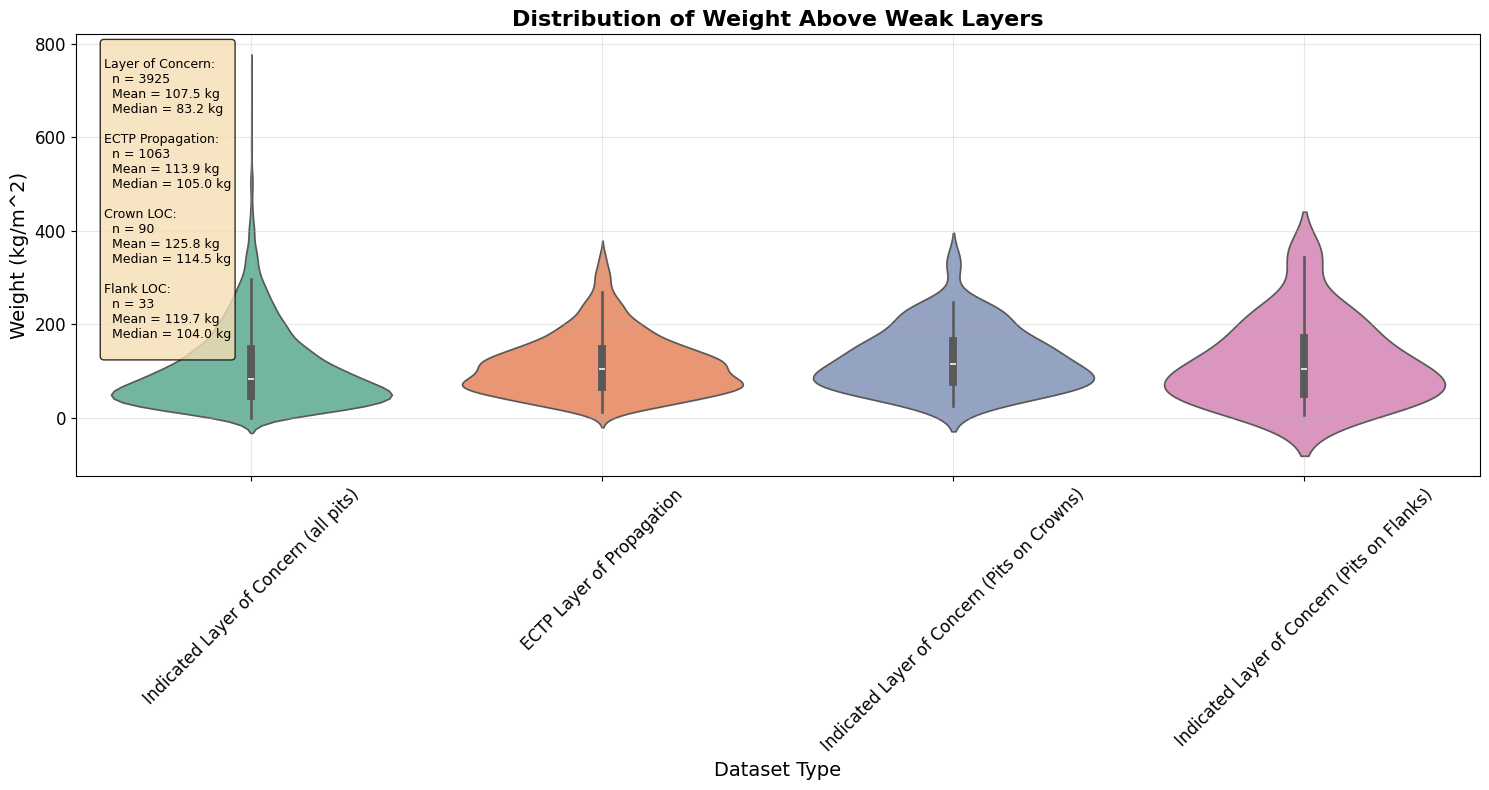

Summary Statistics:
Layer of Concern - Count: 3925, Mean: 107.5 kg, Median: 83.2 kg
ECTP Propagation - Count: 1063, Mean: 113.9 kg, Median: 105.0 kg
Crown LOC - Count: 90, Mean: 125.8 kg, Median: 114.5 kg
Flank LOC - Count: 33, Mean: 119.7 kg, Median: 104.0 kg


In [54]:
# Create side-by-side violin plots for LOC, ECTP, Crown, and Flank results

# First, prepare the data for plotting
# Remove NaN values and create a combined dataset for easy plotting
LOC_clean = LOC_results_df[LOC_results_df['weight_above_layer_of_concern'].notna()].copy()
ECTP_clean = ECTP_results_df[ECTP_results_df['weight_above_ECTP_layer_of_propagation'].notna()].copy()
Crown_clean = pits_on_crowns_with_LOC_results_df[pits_on_crowns_with_LOC_results_df['weight_above_layer_of_concern'].notna()].copy()
Flank_clean = pits_on_flanks_with_LOC_results_df[pits_on_flanks_with_LOC_results_df['weight_above_layer_of_concern'].notna()].copy()

# Create a combined dataset for seaborn
LOC_clean['dataset'] = 'Indicated Layer of Concern (all pits)'
LOC_clean['weight'] = LOC_clean['weight_above_layer_of_concern']

ECTP_clean['dataset'] = 'ECTP Layer of Propagation'
ECTP_clean['weight'] = ECTP_clean['weight_above_ECTP_layer_of_propagation']

Crown_clean['dataset'] = 'Indicated Layer of Concern (Pits on Crowns)'
Crown_clean['weight'] = Crown_clean['weight_above_layer_of_concern']

Flank_clean['dataset'] = 'Indicated Layer of Concern (Pits on Flanks)'
Flank_clean['weight'] = Flank_clean['weight_above_layer_of_concern']

# Combine datasets
combined_df = pd.concat([
    LOC_clean[['dataset', 'weight']], 
    ECTP_clean[['dataset', 'weight']],
    Crown_clean[['dataset', 'weight']],
    Flank_clean[['dataset', 'weight']]
], ignore_index=True)

# Create the violin plot
plt.figure(figsize=(15, 8))
ax = sns.violinplot(data=combined_df, x='dataset', y='weight', palette='Set2')

# Customize the plot
plt.title('Distribution of Weight Above Weak Layers', fontsize=16, fontweight='bold')
plt.xlabel('Dataset Type', fontsize=14)
plt.ylabel('Weight (kg/m^2)', fontsize=14)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add statistical information as text
stats_text = f"""
Layer of Concern:
  n = {len(LOC_clean)}
  Mean = {LOC_clean['weight'].mean():.1f} kg
  Median = {LOC_clean['weight'].median():.1f} kg

ECTP Propagation:
  n = {len(ECTP_clean)}
  Mean = {ECTP_clean['weight'].mean():.1f} kg
  Median = {ECTP_clean['weight'].median():.1f} kg

Crown LOC:
  n = {len(Crown_clean)}
  Mean = {Crown_clean['weight'].mean():.1f} kg
  Median = {Crown_clean['weight'].median():.1f} kg

Flank LOC:
  n = {len(Flank_clean)}
  Mean = {Flank_clean['weight'].mean():.1f} kg
  Median = {Flank_clean['weight'].median():.1f} kg
"""

plt.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("Summary Statistics:")
print(f"Layer of Concern - Count: {len(LOC_clean)}, Mean: {LOC_clean['weight'].mean():.1f} kg, Median: {LOC_clean['weight'].median():.1f} kg")
print(f"ECTP Propagation - Count: {len(ECTP_clean)}, Mean: {ECTP_clean['weight'].mean():.1f} kg, Median: {ECTP_clean['weight'].median():.1f} kg")
print(f"Crown LOC - Count: {len(Crown_clean)}, Mean: {Crown_clean['weight'].mean():.1f} kg, Median: {Crown_clean['weight'].median():.1f} kg")
print(f"Flank LOC - Count: {len(Flank_clean)}, Mean: {Flank_clean['weight'].mean():.1f} kg, Median: {Flank_clean['weight'].median():.1f} kg")


Next Steps
- Figure out why violin plots go below 0
- Think about how to compare / align theoretical benchmark snow profiles w/real world profiles
    - Particularly in crown / flank pits
- Add bending stiffness to calculations
- Get SnowPilot density info